# Let's start out ITSA by importing libraries as usual
## Pandas for processing data
## What do we use for ITSA?

In [1]:
import numpy as np
import pandas as pd

## Let's read in our dataframe, and if look at the output
### For this analysis we just need the date, sentiment_analysis, and language so we will drop all other columns
### Some of the tweets failed sentiment analysis and so we drop rows where sentiment_analysis column = 'e', as error from sentiment analysis notebook got save as e for some reason

In [2]:
cols = ['date', 'lang', 'sentiment_analysis']
df = pd.read_csv('data/filtered_with_sentiment_df.csv', usecols=cols)
len(df)

1648284

In [3]:
df = df[df['sentiment_analysis'] != 'e']
df

,date,lang,sentiment_analysis
0,2022-09-16 21:43:23+00:00,en,"{'label': 'NEU', 'score': 0.8719840049743652}"
1,2022-09-16 21:41:11+00:00,en,"{'label': 'NEG', 'score': 0.9854556918144226}"
2,2022-09-16 21:39:28+00:00,en,"{'label': 'NEG', 'score': 0.9151191115379333}"
3,2022-09-16 21:34:32+00:00,en,"{'label': 'NEU', 'score': 0.8916952610015869}"
4,2022-09-16 21:31:36+00:00,en,"{'label': 'NEG', 'score': 0.9545831084251404}"
...,...,...,...
1648279,2020-01-01 00:37:27+00:00,en,"{'label': 'NEG', 'score': 0.9454789161682129}"
1648280,2020-01-01 00:30:00+00:00,en,"{'label': 'NEG', 'score': 0.8939607739448547}"
1648281,2020-01-01 00:15:00+00:00,en,"{'label': 'NEU', 'score': 0.9749820828437805}"
1648282,2020-01-01 00:10:02+00:00,en,"{'label': 'NEG', 'score': 0.8888190388679504}"


### If you are familiar with ITSA (interrupted time series analysis) you know it works on numeric data, usually continuous
### So to do ITSA, we will need to essentially one-hot (or categorical -> numerical map) our sentiment labels NEG-> 0, NEU -> 1, POS -> 2

In [4]:
def onehot_sentiment(element):
    if 'NEG' in element:
        ohs = float(0)
        return ohs
    elif 'POS' in element:
        ohs = 1.0
        return ohs
    elif 'NEU' in element:
        ohs = 0.5
        return ohs
    else:
        ohs = np.nan
        return ohs

In [5]:
df['one_hot_sent'] = df['sentiment_analysis'].apply(lambda x: onehot_sentiment(x))
df['one_hot_sent']

0          0.5
1          0.0
2          0.0
3          0.5
4          0.0
          ... 
1648279    0.0
1648280    0.0
1648281    0.5
1648282    0.0
1648283    0.5
Name: one_hot_sent, Length: 1366835, dtype: float64

### We should probably drop all languages that are not english for this analysis

In [6]:
df = df[df.lang == 'en']
df

,date,lang,sentiment_analysis,one_hot_sent
0,2022-09-16 21:43:23+00:00,en,"{'label': 'NEU', 'score': 0.8719840049743652}",0.5
1,2022-09-16 21:41:11+00:00,en,"{'label': 'NEG', 'score': 0.9854556918144226}",0.0
2,2022-09-16 21:39:28+00:00,en,"{'label': 'NEG', 'score': 0.9151191115379333}",0.0
3,2022-09-16 21:34:32+00:00,en,"{'label': 'NEU', 'score': 0.8916952610015869}",0.5
4,2022-09-16 21:31:36+00:00,en,"{'label': 'NEG', 'score': 0.9545831084251404}",0.0
...,...,...,...,...
1648279,2020-01-01 00:37:27+00:00,en,"{'label': 'NEG', 'score': 0.9454789161682129}",0.0
1648280,2020-01-01 00:30:00+00:00,en,"{'label': 'NEG', 'score': 0.8939607739448547}",0.0
1648281,2020-01-01 00:15:00+00:00,en,"{'label': 'NEU', 'score': 0.9749820828437805}",0.5
1648282,2020-01-01 00:10:02+00:00,en,"{'label': 'NEG', 'score': 0.8888190388679504}",0.0


### Let's organize the data by date time as an index, group by Month and plot the trend of our now one-hot score sentiment as a month average = y, over months = x

In [7]:
df['date'] = pd.to_datetime(df['date'])
df.index = pd.to_datetime(df['date'],format='%m/%d/%y %I:%M%p')
df.drop('lang', axis=1, inplace=True)
df.drop('sentiment_analysis', axis=1, inplace=True)
df = df.groupby(pd.Grouper(freq='D')).mean()
df

/tmp/ipykernel_154689/472197569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_154689/472197569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('lang', axis=1, inplace=True)
/tmp/ipykernel_154689/472197569.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('sentiment_analysis', axis=1, inplace=True)


,one_hot_sent
date,
2020-01-01 00:00:00+00:00,0.226190
2020-01-02 00:00:00+00:00,0.212048
2020-01-03 00:00:00+00:00,0.182765
2020-01-04 00:00:00+00:00,0.164201
2020-01-05 00:00:00+00:00,0.186975
...,...
2022-09-12 00:00:00+00:00,0.242199
2022-09-13 00:00:00+00:00,0.194480
2022-09-14 00:00:00+00:00,0.232363


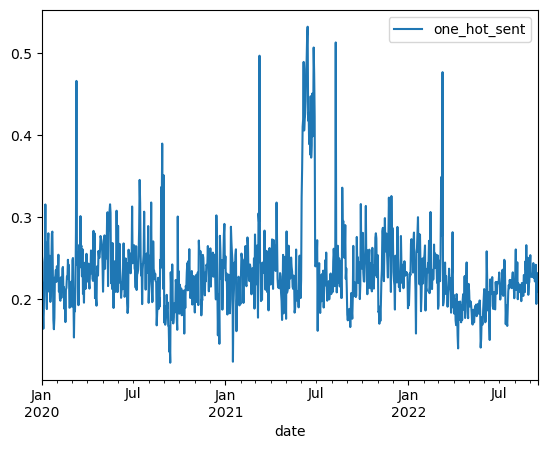

In [8]:
import matplotlib.pyplot as plt
fig = df.plot()
plt.show()